# 2. Modern Data Architecture for Big Data I - MarketStack Pipeline using Spark and MinIO

**Group 4**: Laura Barros, María Fernanda Hernández, Paula Cáceres, Rawad Yared, Álvaro Verona

This notebook focuses on reading financial data stored in MinIO from the MarketStack API, using Apache Spark for processing and pandas/matplotlib for analysis.

In [2]:
from pyspark.sql import SparkSession

spark_session = SparkSession.builder \
    .appName("MarketStack-MinIO") \
    .config("spark.hadoop.fs.s3a.access.key", "s3access") \
    .config("spark.hadoop.fs.s3a.secret.key", "_s3access123$") \
    .config("spark.hadoop.fs.s3a.path.style.access", "true") \
    .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
    .config("spark.hadoop.fs.s3a.endpoint", "http://localhost:9000") \
    .getOrCreate()

## Step 2 - Read files from MinIO bucket

In [4]:
from pyspark.sql.functions import input_file_name

df = spark_session.read.json("s3a://mda-ga-bucket/*")
df = df.withColumn("source_file", input_file_name())
df.printSchema()
df.show(1, truncate=False)

root
 |-- data: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- adj_close: double (nullable = true)
 |    |    |-- adj_high: string (nullable = true)
 |    |    |-- adj_low: string (nullable = true)
 |    |    |-- adj_open: string (nullable = true)
 |    |    |-- adj_volume: string (nullable = true)
 |    |    |-- asset_type: string (nullable = true)
 |    |    |-- close: double (nullable = true)
 |    |    |-- date: string (nullable = true)
 |    |    |-- dividend: double (nullable = true)
 |    |    |-- exchange: string (nullable = true)
 |    |    |-- exchange_code: string (nullable = true)
 |    |    |-- high: double (nullable = true)
 |    |    |-- low: double (nullable = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- open: double (nullable = true)
 |    |    |-- price_currency: string (nullable = true)
 |    |    |-- split_factor: double (nullable = true)
 |    |    |-- symbol: string (nullable = true)
 |    |    |-- volu

## Step 3 - Extract and clean nested JSON

In [5]:
from pyspark.sql.functions import explode, col

exploded_df = df.select(explode("data").alias("record"))

df_clean_INDRA = exploded_df.select(
    col("record.symbol"),
    col("record.date"),
    col("record.open"),
    col("record.high"),
    col("record.low"),
    col("record.close"),
    col("record.volume")
)

df_clean_INDRA.show(20)

+------+--------------------+-----+-----+-----+-----+---------+
|symbol|                date| open| high|  low|close|   volume|
+------+--------------------+-----+-----+-----+-----+---------+
|IDR.MC|2025-06-20T00:00:...|34.28|34.96|34.18|34.18|3333792.0|
|IDR.MC|2025-06-19T00:00:...| 36.2|36.36|33.36| 34.1|1765893.0|
|IDR.MC|2025-06-18T00:00:...|36.02| 36.8| 35.9| 36.3| 676714.0|
|IDR.MC|2025-06-16T00:00:...|36.46|36.74|35.76|35.88| 588846.0|
|IDR.MC|2025-06-06T00:00:...| 36.2|36.58| 34.8|35.04|1618483.0|
|IDR.MC|2025-06-05T00:00:...|34.86|36.28|34.86|36.28|1214746.0|
|IDR.MC|2025-06-04T00:00:...|36.22|36.88|34.24|34.76|2496393.0|
|IDR.MC|2025-06-03T00:00:...| 37.8|37.84|36.22|36.22|1253306.0|
|IDR.MC|2025-06-02T00:00:...|36.36|37.64|36.34|37.34|1059177.0|
|IDR.MC|2025-05-30T00:00:...|35.72|36.48| 35.6|36.24|1104465.0|
|IDR.MC|2025-05-29T00:00:...| 36.5| 36.5| 35.2|35.84| 804674.0|
|IDR.MC|2025-05-28T00:00:...|36.16|36.52| 35.8|36.08| 779813.0|
|IDR.MC|2025-05-27T00:00:...| 35.9|36.42

## Step 4 - Visualize data using pandas and matplotlib

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Closing Price Evolution – Indra (IDR.MC)')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Closing Price (EUR)')

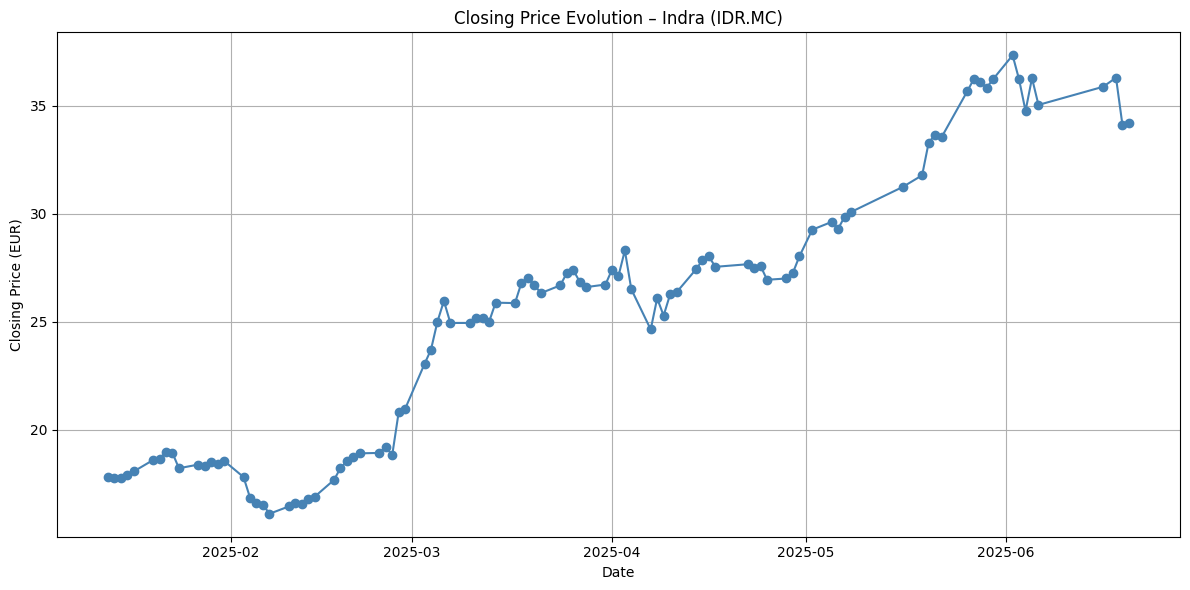

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df_pd = df_clean_INDRA.toPandas()
df_pd['date'] = pd.to_datetime(df_pd['date'])
df_pd = df_pd.sort_values('date')

plt.figure(figsize=(12, 6))
plt.plot(df_pd['date'], df_pd['close'], marker='o', linestyle='-', color='steelblue')
plt.title("Closing Price Evolution – Indra (IDR.MC)")
plt.xlabel("Date")
plt.ylabel("Closing Price (EUR)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
from pyspark.sql.functions import input_file_name

df = spark_session.read.json("s3a://mda-ga-bucket2/*")
df = df.withColumn("source_file", input_file_name())
df.printSchema()
df.show(1, truncate=False)

root
 |-- data: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- adj_close: double (nullable = true)
 |    |    |-- adj_high: string (nullable = true)
 |    |    |-- adj_low: string (nullable = true)
 |    |    |-- adj_open: string (nullable = true)
 |    |    |-- adj_volume: string (nullable = true)
 |    |    |-- asset_type: string (nullable = true)
 |    |    |-- close: double (nullable = true)
 |    |    |-- date: string (nullable = true)
 |    |    |-- dividend: double (nullable = true)
 |    |    |-- exchange: string (nullable = true)
 |    |    |-- exchange_code: string (nullable = true)
 |    |    |-- high: double (nullable = true)
 |    |    |-- low: double (nullable = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- open: double (nullable = true)
 |    |    |-- price_currency: string (nullable = true)
 |    |    |-- split_factor: double (nullable = true)
 |    |    |-- symbol: string (nullable = true)
 |    |    |-- volu

In [9]:
from pyspark.sql.functions import explode, col

exploded_df = df.select(explode("data").alias("record"))

df_clean_INDRA = exploded_df.select(
    col("record.symbol"),
    col("record.date"),
    col("record.open"),
    col("record.high"),
    col("record.low"),
    col("record.close"),
    col("record.volume")
)

df_clean_INDRA.show(20)

+------+--------------------+------+------+------+------+---------+
|symbol|                date|  open|  high|   low| close|   volume|
+------+--------------------+------+------+------+------+---------+
|AIR.PA|2025-06-20T00:00:...| 163.0|168.56|162.44| 167.5|2619645.0|
|AIR.PA|2025-06-19T00:00:...| 162.6|163.38|161.36|161.76| 592042.0|
|AIR.PA|2025-06-18T00:00:...|161.22|166.96|161.22|162.98|1249445.0|
|AIR.PA|2025-06-16T00:00:...|162.48|163.08|161.56|162.02| 766106.0|
|AIR.PA|2025-06-06T00:00:...| 165.0|165.88| 163.8|165.34| 869676.0|
|AIR.PA|2025-06-05T00:00:...| 169.5| 169.9| 165.5| 165.5|1228318.0|
|AIR.PA|2025-06-04T00:00:...|169.92| 173.8|168.86|170.18|1551623.0|
|AIR.PA|2025-06-03T00:00:...|163.72|166.44|161.22|166.44|1192092.0|
|AIR.PA|2025-06-02T00:00:...|161.94| 163.0|159.88|162.58| 707780.0|
|AIR.PA|2025-05-30T00:00:...|164.92|163.96|162.08|162.08|1136818.0|
|AIR.PA|2025-05-29T00:00:...|164.92| 165.4|162.48|162.56| 611176.0|
|AIR.PA|2025-05-28T00:00:...| 162.5|165.76|161.8

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Closing Price Evolution – AIRBUS (AIR.PA)')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Closing Price (EUR)')

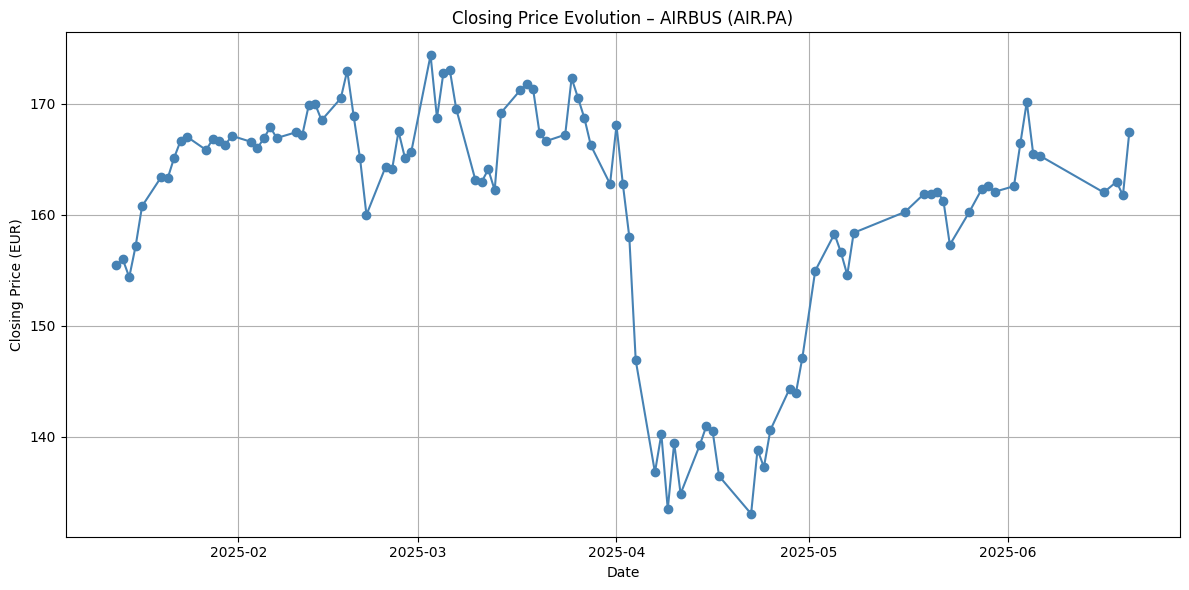

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df_pd = df_clean_INDRA.toPandas()
df_pd['date'] = pd.to_datetime(df_pd['date'])
df_pd = df_pd.sort_values('date')

plt.figure(figsize=(12, 6))
plt.plot(df_pd['date'], df_pd['close'], marker='o', linestyle='-', color='steelblue')
plt.title("Closing Price Evolution – AIRBUS (AIR.PA)")
plt.xlabel("Date")
plt.ylabel("Closing Price (EUR)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Sentiment Analysis from News Headlines (Last Month)

In [11]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the news file
news_df = pd.read_csv("news_indra_airbus_nato_last_month_with_sentiment.csv")

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Compute sentiment scores
news_df["sentiment_title"] = news_df["title"].astype(str).apply(lambda x: analyzer.polarity_scores(x)["compound"])
news_df["sentiment_description"] = news_df["description"].astype(str).apply(lambda x: analyzer.polarity_scores(x)["compound"])

# Preview
news_df[["publishedAt", "company", "sentiment_title", "sentiment_description"]].head()


,publishedAt,company,sentiment_title,sentiment_description
0,2025-06-19T12:49:55Z,Indra,0.2924,-0.5574
1,2025-06-20T16:25:57Z,Indra,0.1531,0.0000
2,2025-07-10T11:20:59Z,Indra,0.0000,0.5574
3,2025-06-25T11:00:00Z,Indra,0.0000,0.0000
4,2025-07-12T12:03:00Z,Indra,0.0000,-0.4215


In [12]:
# Convert date and group by company
news_df["date"] = pd.to_datetime(news_df["publishedAt"]).dt.date

avg_sentiment = news_df.groupby("company")[["sentiment_title", "sentiment_description"]].mean()
avg_sentiment.style.background_gradient(cmap="RdYlGn")


,sentiment_title,sentiment_description
company,,
Airbus,-0.056071,0.045506
Indra,0.070255,0.185304
NATO,-0.096393,-0.073788


## Join sentiment + price in Spark

In [13]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load CSV (assuming already in VM)
df_news = pd.read_csv("news_indra_airbus_nato_last_month_with_sentiment.csv")

# Compute sentiment
analyzer = SentimentIntensityAnalyzer()
df_news['sentiment_title'] = df_news['title'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound']) 
df_news['sentiment_description'] = df_news['description'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])
# Calculate and amplify average sentiment
df_news['sentiment_avg'] = (df_news['sentiment_title'] + df_news['sentiment_description']) / 2
df_news['sentiment_avg'] = df_news['sentiment_avg'] * 3  # Amplify spikes

# Save new file with sentiment
df_news.to_csv("news_indra_airbus_nato_last_month_with_sentiment.csv", index=False)
print("File updated with sentiment")

File updated with sentiment


In [14]:
# Load the CSV with sentiment scores
sentiment_df = spark_session.read.option("header", "true") \
    .csv("news_indra_airbus_nato_last_month_with_sentiment.csv")

# Convert date format
from pyspark.sql.functions import to_date, col
sentiment_df = sentiment_df.withColumn("publishedAt", to_date("publishedAt"))

# Preview
sentiment_df.select("company", "publishedAt", "sentiment_title", "sentiment_description").show(5)


+-------+-----------+---------------+---------------------+
|company|publishedAt|sentiment_title|sentiment_description|
+-------+-----------+---------------+---------------------+
|  Indra| 2025-06-19|         0.2924|              -0.5574|
|  Indra| 2025-06-20|         0.1531|                  0.0|
|  Indra| 2025-07-10|            0.0|               0.5574|
|   NULL| 2025-06-25|           NULL|                 NULL|
|    0.0|       NULL|            0.0|                 NULL|
+-------+-----------+---------------+---------------------+
only showing top 5 rows



In [22]:
# Join Indra sentiment with stock prices
joined_indra = df_clean_INDRA.join(
    sentiment_df.filter(col("company") == "Indra"),
    df_clean_INDRA["date"] == sentiment_df["publishedAt"],
    how="left"
)

joined_indra.select("date", "close", "sentiment_title", "sentiment_description").show(10)


+--------------------+------+---------------+---------------------+
|                date| close|sentiment_title|sentiment_description|
+--------------------+------+---------------+---------------------+
|2025-06-20T00:00:...| 167.5|            0.0|               0.8225|
|2025-06-20T00:00:...| 167.5|            0.0|               0.7003|
|2025-06-20T00:00:...| 167.5|         0.1531|                  0.0|
|2025-06-20T00:00:...| 167.5|            0.0|               0.6124|
|2025-06-20T00:00:...| 167.5|         0.1531|                  0.0|
|2025-06-19T00:00:...|161.76|         0.2924|              -0.5574|
|2025-06-18T00:00:...|162.98|         0.6486|               0.6808|
|2025-06-18T00:00:...|162.98|         0.5106|               0.9062|
|2025-06-16T00:00:...|162.02|           NULL|                 NULL|
|2025-06-06T00:00:...|165.34|           NULL|                 NULL|
+--------------------+------+---------------+---------------------+
only showing top 10 rows



Text(0.5, 0, 'Date')

Text(0, 0.5, 'Stock Price (EUR)')

Text(0, 0.5, 'Sentiment (compound)')

Text(0.5, 1.0, 'Indra – Closing Price vs. News Sentiment (Last Month)')

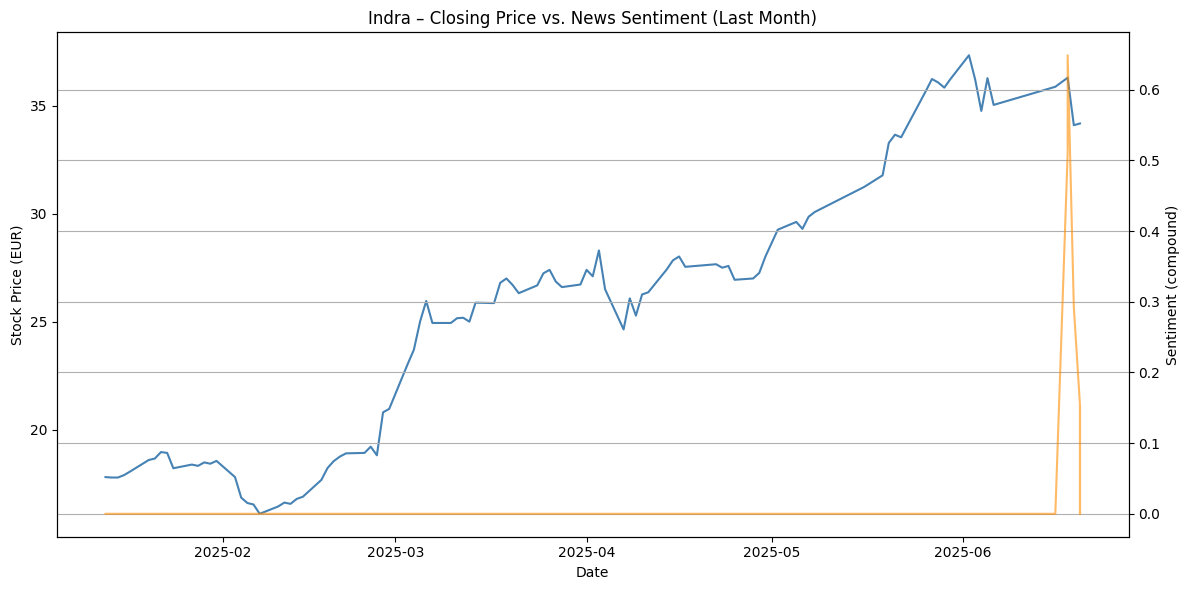

In [23]:
from pyspark.sql.functions import explode, col, to_date
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load INDRA stock data from MinIO
df_marketstack_indra = spark_session.read.json("s3a://mda-ga-bucket/*")

# Step 2: Flatten JSON and extract INDRA records
df_flat_indra = df_marketstack_indra.select(explode("data").alias("record"))
df_clean_INDRA = df_flat_indra.select(
    col("record.symbol").alias("symbol"),
    col("record.date").alias("date"),
    col("record.close").alias("close")
).filter(col("symbol") == "IDR.MC")

# Step 3: Load sentiment CSV and prepare
sentiment_df = spark_session.read.option("header", "true") \
    .csv("news_indra_airbus_nato_last_month_with_sentiment.csv")
sentiment_df = sentiment_df.withColumn("publishedAt", to_date("publishedAt"))

# Step 4: Filter only INDRA-related news
sentiment_indra_df = sentiment_df.filter(col("company") == "Indra")

# Step 5: Join stock data with sentiment
joined_indra = df_clean_INDRA.join(
    sentiment_indra_df,
    df_clean_INDRA["date"] == sentiment_indra_df["publishedAt"],
    how="left"
)

# Step 6: Plot
df_plot = joined_indra.select("date", "close", "sentiment_title").toPandas()
df_plot["date"] = pd.to_datetime(df_plot["date"])
df_plot["sentiment_title"] = df_plot["sentiment_title"].astype(float).fillna(0)
df_plot = df_plot.sort_values("date")

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(df_plot['date'], df_plot['close'], color='steelblue', label='Closing Price')
ax2 = ax1.twinx()
ax2.plot(df_plot['date'], df_plot['sentiment_title'], color='darkorange', label='Sentiment Score', alpha=0.6)

ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (EUR)")
ax2.set_ylabel("Sentiment (compound)")
plt.title("Indra – Closing Price vs. News Sentiment (Last Month)")
plt.grid(True)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Stock Price (EUR)')

Text(0, 0.5, 'Sentiment (compound)')

Text(0.5, 1.0, ' Airbus – Closing Price vs. News Sentiment (Last Month)')

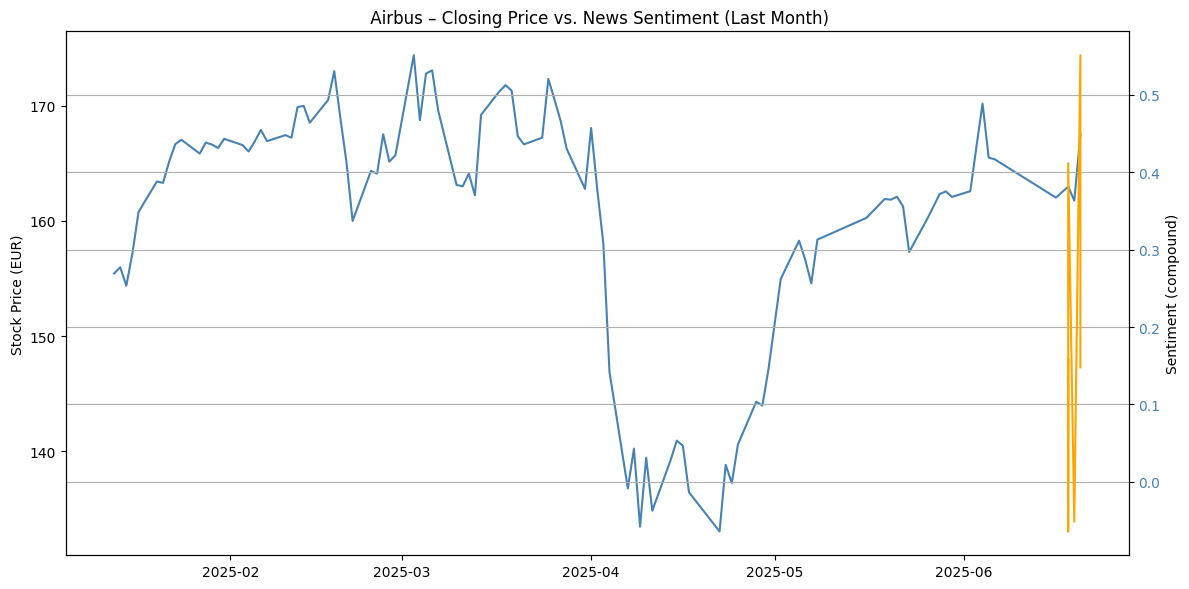

In [30]:
#exactly the same process of AIRBUS


file_path = "file:///home/osbdet/notebooks/LAB_S15_MINIO/Group Assignment /news_indra_airbus_nato_last_month_with_sentiment.csv"
sentiment_df = spark_session.read.option("header", "true").csv(file_path)

from pyspark.sql.functions import explode, col, to_date
import pandas as pd
import matplotlib.pyplot as plt

# 1. Leer JSON desde MinIO
df = spark_session.read.option("multiline", "true").json("s3a://mda-ga-bucket2/*")

# 2. explode and clean
exploded_df = df.select(explode("data").alias("record"))

stock_df = exploded_df.select(
    col("record.symbol"),
    col("record.date").alias("date"),
    col("record.close")
)

df_clean_AIRBUS = stock_df.filter(col("symbol") == "AIR.PA")

# 3. Read sentiment analysisfrom local Jupyter Library (CSV file)
sentiment_path = "file:///home/osbdet/notebooks/LAB_S15_MINIO/Group Assignment /news_indra_airbus_nato_last_month_with_sentiment.csv"

sentiment_df = spark_session.read.option("header", "true").csv(sentiment_path)
sentiment_df = sentiment_df.withColumn("publishedAt", to_date("publishedAt"))

# 4. Average sentiment 
sentiment_df = sentiment_df.withColumn(
    "sentiment_avg",
    (col("sentiment_title").cast("double") + col("sentiment_description").cast("double")) / 2
)

# 5. filter airbus news
sentiment_airbus_df = sentiment_df.filter(col("company") == "Airbus")

# 6. Join per date
joined_airbus = df_clean_AIRBUS.join(
    sentiment_airbus_df,
    df_clean_AIRBUS["date"] == sentiment_airbus_df["publishedAt"],
    how="left"
)

# 7. Convert to Pandas
df_pd = joined_airbus.select("date", "close", "sentiment_avg").toPandas()
df_pd["date"] = pd.to_datetime(df_pd["date"])
df_pd = df_pd.sort_values("date")

# 8.  Plot 
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_pd["date"], df_pd["close"], label="Closing Price (EUR)", color="steelblue")
ax1.set_ylabel("Stock Price (EUR)", color="black")
ax1.tick_params(axis='y', labelcolor="black")

ax2 = ax1.twinx()
ax2.plot(df_pd["date"], df_pd["sentiment_avg"], label="Sentiment Score", color="orange")
ax2.set_ylabel("Sentiment (compound)", color="black")
ax2.tick_params(axis='y', labelcolor="steelblue")

plt.title(" Airbus – Closing Price vs. News Sentiment (Last Month)")
fig.tight_layout()
plt.grid(True)
plt.tight_layout()
plt.show()
